# Tutorial: Analyzing musical pieces on the Tonnetz using *pitchplots*

## Overview

### Introduction

...

### The Tonnetz

...

### Using *pitchplots*

...





In [1]:
from pitchplots.parser import xml_to_csv

In [8]:
from pitchplots.static import tonnetz

In [2]:
# csv = xml_to_csv("data/frescobaldi_toccata.mxl")
csv = xml_to_csv("data/liszt_benediction.mxl")
# csv = xml_to_csv("data/Liszt_S202_Am_Grabe_R.xml")

In [3]:
csv.tail(10)

,filepath,qpm,time_sign_num,time_sign_den,measure_no,no_accs,mode,key_area,type,note_name,tpc,step,acc,octave,pitch,pitch_class,duration,onset,onset_seconds
9467,data/liszt_benediction.mxl,70.0002,4,4,367,6,major,649.767,rest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,366,1263
9468,data/liszt_benediction.mxl,70.0002,4,4,367,6,major,649.767,rest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,366,1263
9469,data/liszt_benediction.mxl,70.0002,4,4,367,6,major,649.767,note,A#3,A#,A,1.0,3,58.0,10.0,1.00,366,1263
9470,data/liszt_benediction.mxl,70.0002,4,4,367,6,major,649.767,note,F#4,F#,F,1.0,4,66.0,6.0,1.00,366,1263
9471,data/liszt_benediction.mxl,70.0002,4,4,367,6,major,649.767,note,C#5,C#,C,1.0,5,73.0,1.0,1.00,366,1263
9472,data/liszt_benediction.mxl,70.0002,4,4,367,6,major,649.767,note,F#1,F#,F,1.0,1,30.0,6.0,1.00,366,1263
9473,data/liszt_benediction.mxl,70.0002,4,4,367,6,major,649.767,note,C#2,C#,C,1.0,2,37.0,1.0,1.00,366,1263
9474,data/liszt_benediction.mxl,70.0002,4,4,367,6,major,649.767,note,F#2,F#,F,1.0,2,42.0,6.0,1.00,366,1263
9475,data/liszt_benediction.mxl,70.0002,4,4,367,6,major,649.767,rest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,366,1263
9476,data/liszt_benediction.mxl,70.0002,4,4,367,6,major,649.767,rest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,366,1263


In [26]:
csv.measure_no.min(), csv.measure_no.max()

(1, 367)

In [40]:
csv[csv.time_sign_num==3].measure_no.value_counts().index.sort_values()

Int64Index([180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
            193, 194, 195, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,
            208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
            221, 222, 223, 224, 312, 313, 315, 316, 317, 319, 320, 321, 322,
            323, 325, 326, 327, 328, 329, 330, 331, 332, 344, 353, 354, 355,
            356, 357, 358, 359, 360],
           dtype='int64')

In [4]:
def replace_x(tpc):
    if type(tpc) != float:
        return tpc.replace("x", "##")
    else:
        return tpc

In [5]:
csv["tpc"] = csv["tpc"].apply(replace_x)

In [6]:
csv.tpc.value_counts(dropna=True)

C#     1191
F#     1150
D#      826
A#      817
B       497
G#      475
E#      337
D       329
A       285
E       212
F       199
G       197
Bb      125
C        91
Eb       88
B#       77
F##      60
Ab       41
C##      37
Db       21
G##      17
Gb       13
Cb        4
D##       3
Fb        2
Name: tpc, dtype: int64

In [7]:
csv.tpc.value_counts().plot(kind="bar")

In [85]:
sections = [
    [0,179],
    [180,225],
    [226, 251]
]

In [92]:
kwargs = {
    "center" : "F#",
    "colorbar" : False,
    "cmap" : "Reds",
    "figsize" : (10,8), 
    "nan_color" : "w",
    "edgecolor" : "k",
    "fontsize" : 1.5,
    "log" : False
}

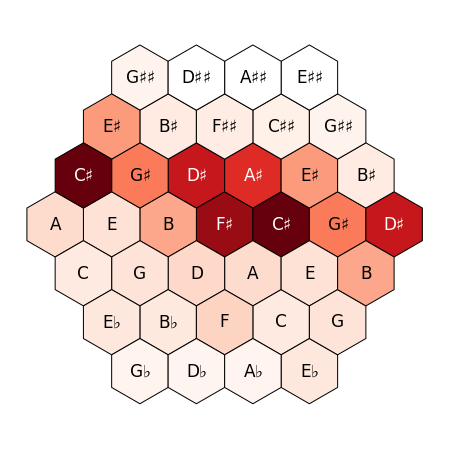

In [93]:
tonnetz(csv, measures=sections[0], **kwargs)

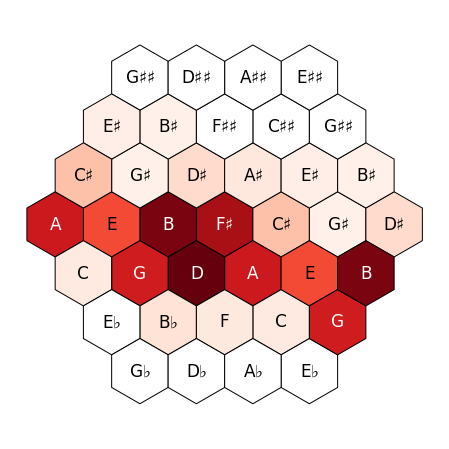

In [94]:
tonnetz(csv, measures=sections[1], **kwargs)

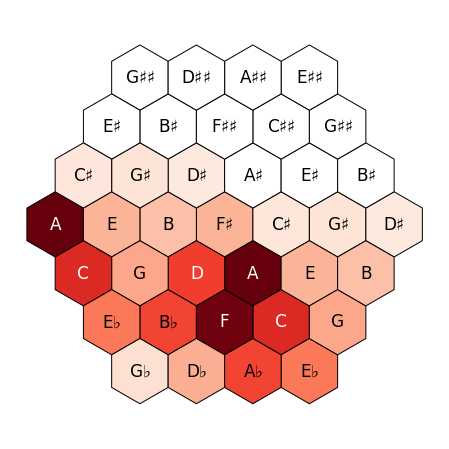

In [95]:
tonnetz(csv, measures=sections[2], **kwargs)

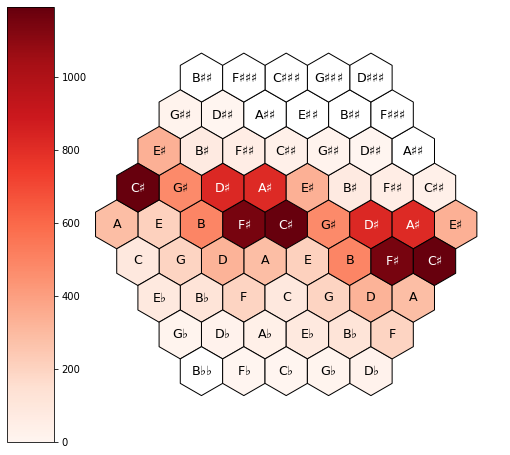

In [25]:
fig = tonnetz(
    csv, 
    cmap="Reds", 
    colorbar=True, 
    figsize=(10,8), 
    edgecolor="k", 
    radius=4, 
    log=False, 
    fontsize=1.5, 
    show=True, 
    nan_color="w",
    duration=False,
)
# fig.savefig("benediction.pdf")

In [64]:
tonnetz(csv, measures=[9,45])

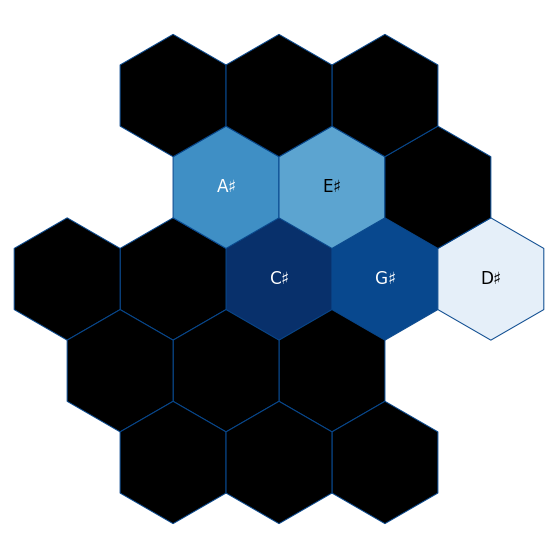

In [47]:
tonnetz(csv, measures=[46,55], duration=False, log=False, figsize=(10,10), colorbar=False, nan_color="k", duplicate=False, radius=2)